<a href="https://colab.research.google.com/github/LuciaHrovatin/Credit_Analytics/blob/main/CreditAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Credit Analytics
## Project 1
### CAS Introduction to Machine Learning in Finance and Insurance (Spring 2025)
#### Navarro Diego - <href>dnavarro@ethz.ch</href>
#### Rizzi Michele - <href>mirizzi@ethz.ch</href>
#### Hrovatin Lucia - <href>lhrovatin@ethz.ch</href>

</center>

In [ ]:
# Import all the Python libraries we are going to use

# Data Transformation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical learning
from scipy.stats import bernoulli
from sklearn import preprocessing
from sklearn import metrics # evaluation metric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import roc_curve # evaluation metric
from sklearn.metrics import roc_auc_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric

# Deep Learning
try:
    import keras
except ImportError:
    !pip install keras --quiet
    import keras

try:
    import keras_tuner
except ImportError:
    !pip install keras-tuner --quiet
    import keras_tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
### Fix random seed for reproducibility
random_seed = 1024
np.random.seed(random_seed)

# Exercise 1. Dataset features generation.

In [ ]:
# Number of samples
m = 20000  # training set
n = 10000  # test set

# Total number of samples
total_samples = m + n

# Generate xi1: age from the uniform distribution on [18, 80]
x1 = np.random.uniform(18, 80, total_samples)

# Generate xi2: monthly income (in CHF 1000) from the uniform distribution on [1, 15]
x2 = np.random.uniform(1, 15, total_samples)

# Generate xi3: salaried/self-employed in {0, 1}, where 0=salaried and 1=self-employed (probability of being self-employed is 10%)
x3 = np.random.choice([0, 1], total_samples, p=[0.9, 0.1])

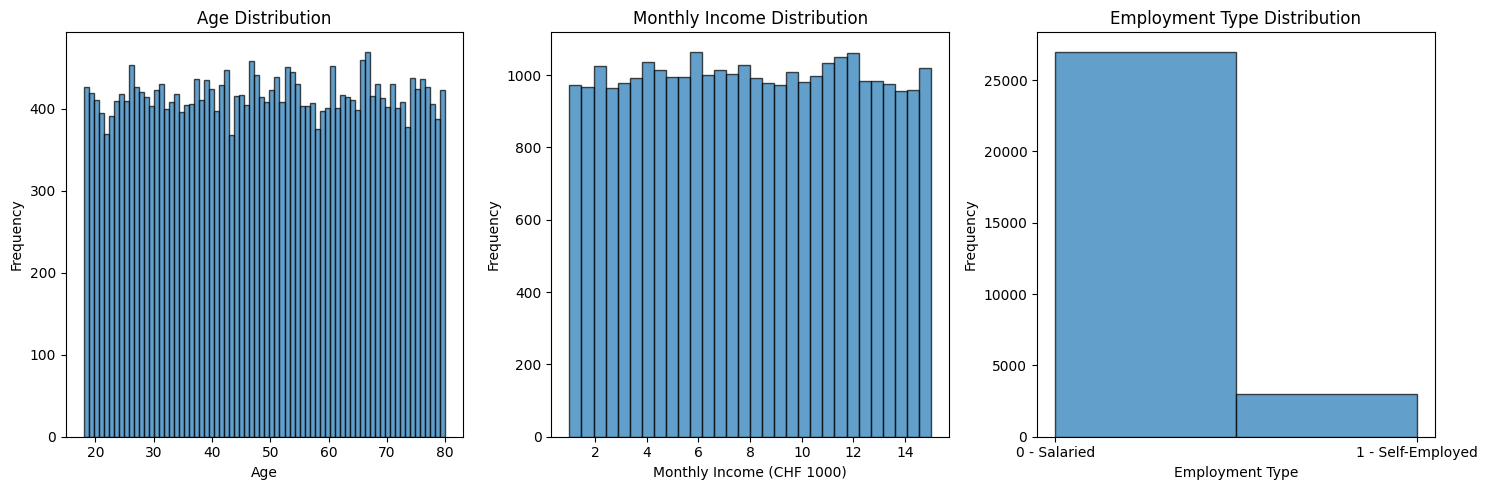

In [ ]:
# Plot histograms for each feature in the dataset
plt.figure(figsize=(15, 5))

# Histogram for xi1: age
plt.subplot(1, 3, 1)
plt.hist(x1, bins=72, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for xi2: monthly income
plt.subplot(1, 3, 2)
plt.hist(x2, bins=30, edgecolor='k', alpha=0.7)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income (CHF 1000)')
plt.ylabel('Frequency')

# Histogram for xi3: salaried/self-employed
plt.subplot(1, 3, 3)
plt.hist(x3, bins=2, edgecolor='k', alpha=0.7)
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')
plt.xticks((0,1), ['0 - Salaried', '1 - Self-Employed'])

plt.tight_layout()
plt.show()

# Exercise 2. Dataset labels generation.

In [ ]:
# Define logistic function
sigmoid = lambda z: 1 / (1 + np.exp(-z))

# Probability functions
p1 = sigmoid(-13.3 + 0.33*x1 - 3.5*x2 + 3*x3)

p2 = sigmoid(-5 + 10*((x1<25) | (x1>75)) - 1.1*x2 + x3)

# Generate labels
y1 = np.random.binomial(1, p1)
y2 = np.random.binomial(1, p2)

# Create dataframes for the labels
df1 = pd.DataFrame({'Age': x1, 'Income': x2, 'Self-employed': x3, 'Default': y1})
df2 = pd.DataFrame({'Age': x1, 'Income': x2, 'Self-employed': x3, 'Default': y2})

In [ ]:
# Divide the dataset into training and test sets
training_set_x, test_set_x = np.stack([x1, x2, x3], axis=1)[:m], np.stack([x1, x2, x3], axis=1)[m:]
training_set_y1, test_set_y1 = y1[:m], y1[m:]
training_set_y2, test_set_y2 = y2[:m], y2[m:]

# Features normalization
scaler = preprocessing.StandardScaler()
training_set_x = scaler.fit_transform(training_set_x)
test_set_x = scaler.transform(test_set_x)

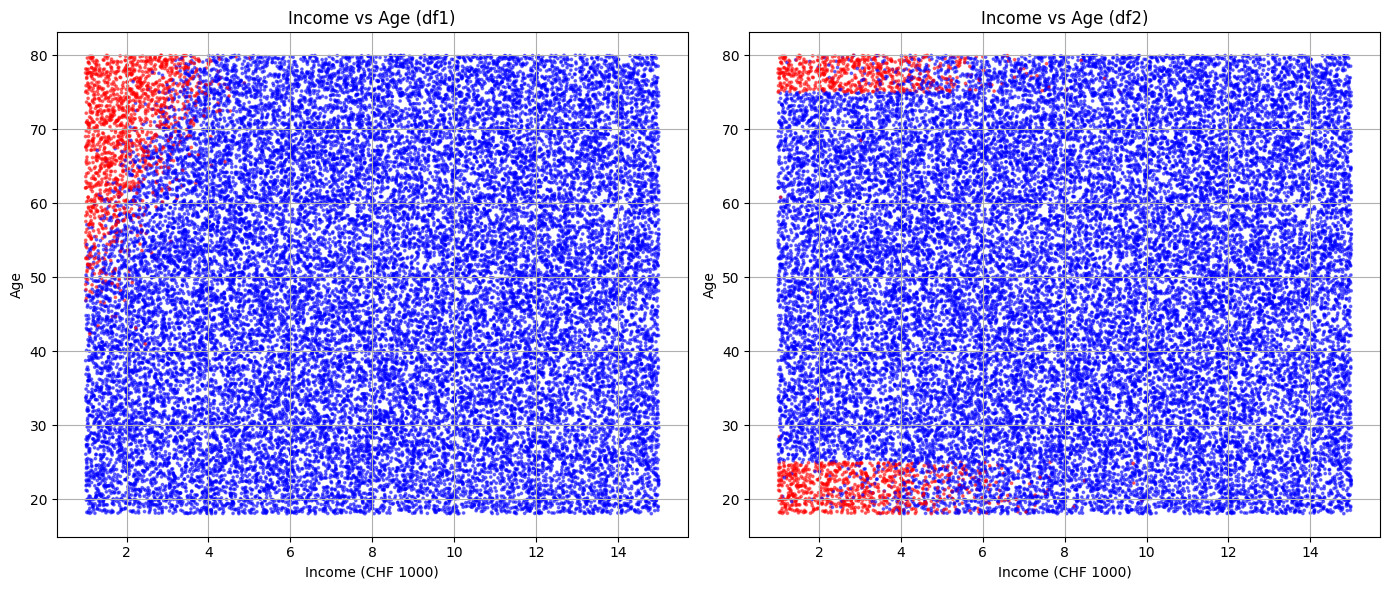

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for df1
plt.subplot(1, 2, 1)
colors = {0: 'blue', 1: 'red'}
plt.scatter(df1['Income'], df1['Age'], c=df1['Default'].apply(lambda x: colors[x]), alpha=0.5, s=3)
plt.title('Income vs Age (df1)')
plt.xlabel('Income (CHF 1000)')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for df2
plt.subplot(1, 2, 2)
plt.scatter(df2['Income'], df2['Age'], c=df2['Default'].apply(lambda x: colors[x]), alpha=0.5, s=3)
plt.title('Income vs Age (df2)')
plt.xlabel('Income (CHF 1000)')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

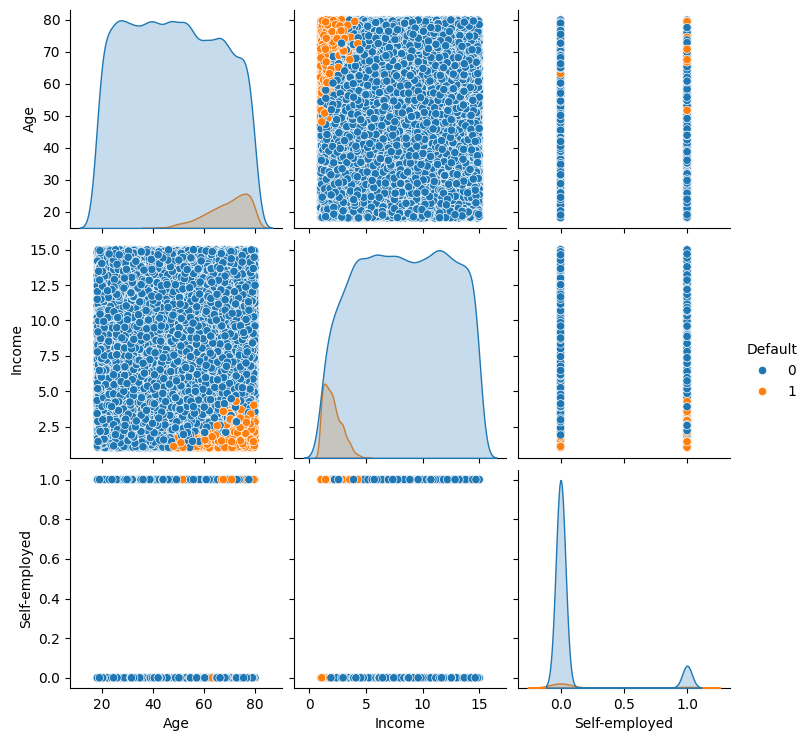

In [ ]:
sns.pairplot(df1, hue='Default')
plt.show()

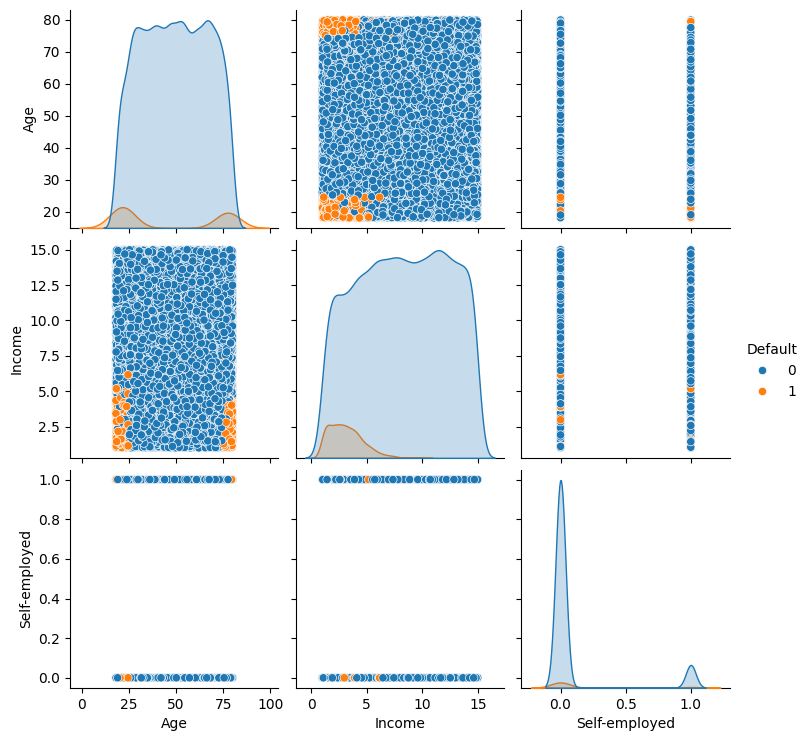

In [ ]:
# Create a pairplot for df2
sns.pairplot(df2, hue='Default')
plt.show()

In [ ]:
# Calculate ratio of default in train dataset
print(f'Default ratio: {y2[:m].mean():.4f}')

Default ratio: 0.0500


# Exercise 3. Model implementations.

### 3a) Logistic regression (LR)

In [ ]:
# Implement and train a logistic regression model
logistic_regression_linear = LogisticRegression(penalty=None, random_state=random_seed).fit(training_set_x, training_set_y1)
logistic_regression_nonlinear = LogisticRegression(penalty=None, random_state=random_seed).fit(training_set_x, training_set_y2)

# Look at the parameters of the fitted model
print('Coefficients1:', logistic_regression_linear.coef_)
print('Intercept1:', logistic_regression_linear.intercept_)
print('Coefficients2:', logistic_regression_nonlinear.coef_)
print('Intercept2:', logistic_regression_nonlinear.intercept_)
# Predict the labels for the test set
predicted_y1 = logistic_regression_linear.predict(test_set_x)
predicted_y2 = logistic_regression_nonlinear.predict(test_set_x)
print(predicted_y1)
print(predicted_y2)

Coefficients1: [[  5.83968978 -13.56330471   0.92321213]]
Intercept1: [-24.05624864]
Coefficients2: [[-0.26284004 -2.07325486  0.1022799 ]]
Intercept2: [-4.45912478]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


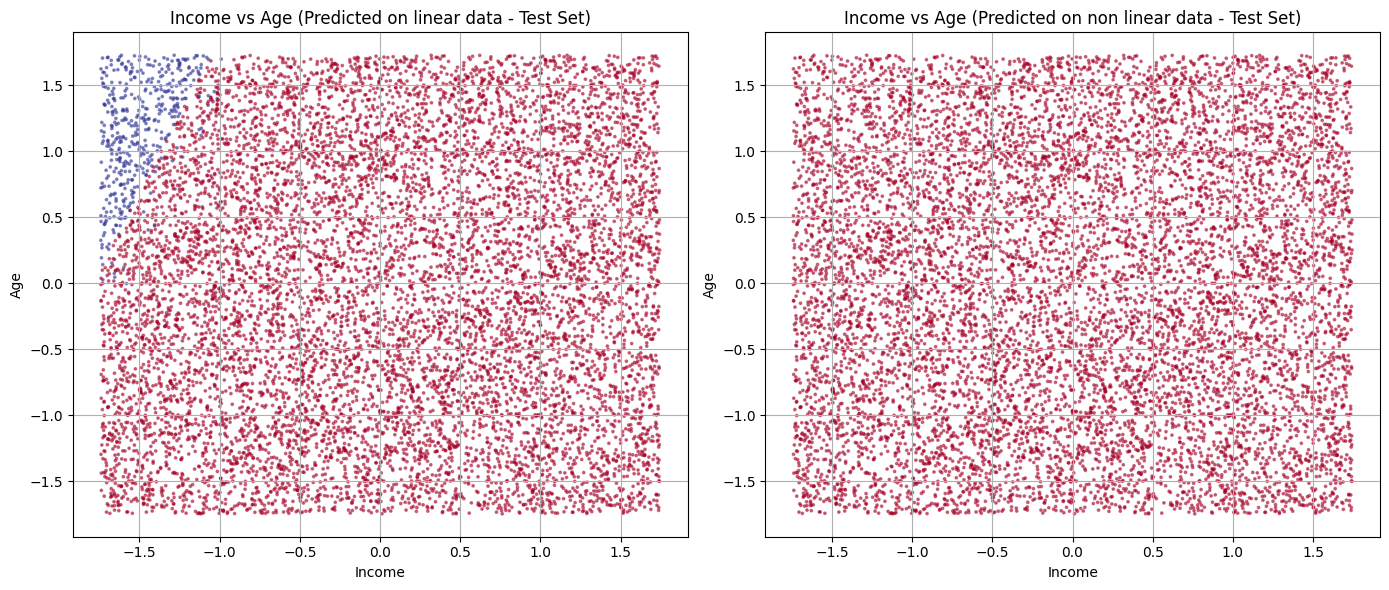

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for predicted_y1
plt.subplot(1, 2, 1)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_y1, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for predicted_y2( really bad!)
plt.subplot(1, 2, 2)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_y2, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on non linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Compute cross-entropy loss for the training set
train_loss_y1 = log_loss(training_set_y1, logistic_regression_linear.predict_proba(training_set_x))
train_loss_y2 = log_loss(training_set_y2, logistic_regression_nonlinear.predict_proba(training_set_x))

# Compute cross-entropy loss for the test set
test_loss_y1 = log_loss(test_set_y1, logistic_regression_linear.predict_proba(test_set_x))
test_loss_y2 = log_loss(test_set_y2, logistic_regression_nonlinear.predict_proba(test_set_x))

print(f'Training Loss for y1: {train_loss_y1:.3f}')
print(f'Training Loss for y2: {train_loss_y2:.3f}')
print(f'Test Loss for y1: {test_loss_y1:.3f}')
print(f'Test Loss for y2: {test_loss_y2:.3f}')

Training Loss for y1: 0.033
Training Loss for y2: 0.149
Test Loss for y1: 0.033
Test Loss for y2: 0.142


Text(0.5, 36.72222222222221, 'Predicted label')

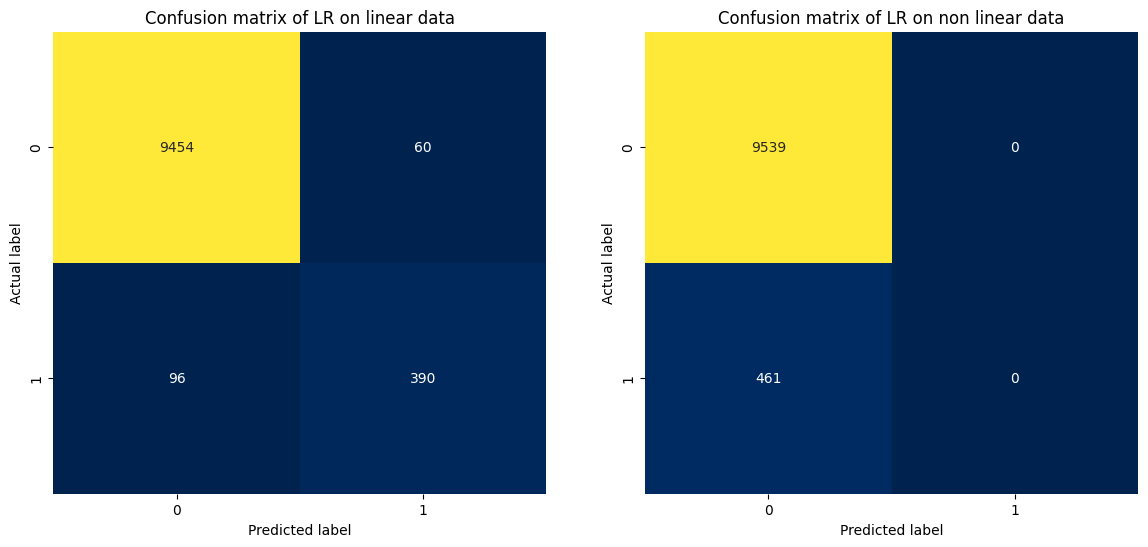

In [ ]:
# Confusion Matrix of the models
plt.figure(figsize=(14, 6))
class_names=[0,1] # prediction names
tick_marks = np.arange(len(class_names))

# Confusion Matrix Linear
plt.subplot(1, 2, 1)
cnf_matrix = metrics.confusion_matrix(test_set_y1, predicted_y1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g', cbar=False)
plt.title('Confusion matrix of LR on linear data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix nonLinear
plt.subplot(1, 2, 2)
cnf_matrix = metrics.confusion_matrix(test_set_y2, predicted_y2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="cividis" ,fmt='g', cbar=False)
plt.title('Confusion matrix of LR on non linear data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['no_loan', 'loan']
print(classification_report(test_set_y1, predicted_y1, target_names=target_names))

print(classification_report(test_set_y2, predicted_y2, target_names=target_names, zero_division=True))

              precision    recall  f1-score   support

     no_loan       0.99      0.99      0.99      9514
        loan       0.87      0.80      0.83       486

    accuracy                           0.98     10000
   macro avg       0.93      0.90      0.91     10000
weighted avg       0.98      0.98      0.98     10000

              precision    recall  f1-score   support

     no_loan       0.95      1.00      0.98      9539
        loan       1.00      0.00      0.00       461

    accuracy                           0.95     10000
   macro avg       0.98      0.50      0.49     10000
weighted avg       0.96      0.95      0.93     10000



### 3b) Neural network (NN)

In [ ]:
# Implement and train a neural network model
# Starting Parameters
lr = 0.001 # learning rate
batch_size = 64
epochs = 200

def NeuralNetwork(units, lr, hl_number):
  """
  This function creates a neural network, depending on the given parameters:
  - units: number of neurons in the hidden layers
  - lr: learning rate
  - hl_number: number of hidden layers
  - Adds batch normalization after each dense hidden layer.
  """

  model = keras.Sequential()
  model.add(keras.Input(shape=(3,)))

  for i in range(hl_number):
    model.add(keras.layers.Dense(units,
                               activation='relu',
                               kernel_initializer='glorot_uniform', # Weight initialization
                               bias_initializer='zeros'))  # Features initialization)
    model.add(keras.layers.BatchNormalization())  # Batch normalization

  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                loss=keras.losses.BinaryCrossentropy())
  return model

neural_network_linear = NeuralNetwork(20, lr, 2)
neural_network_nonlinear = NeuralNetwork(50, lr, 3)

neural_network_linear.summary()
neural_network_nonlinear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681 (2.66 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 80 (320.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 50)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,951 (23.25 KB)

 Trainable params: 5,651 (22.07 KB)

 Non-trainable params: 300 (1.17 KB)

In [ ]:
# Train the model
history1_linear = neural_network_linear.fit(x=training_set_x, y=training_set_y1, batch_size=batch_size, epochs=epochs)

history2_nonlinear = neural_network_nonlinear.fit(x=training_set_x, y=training_set_y2, batch_size=batch_size, epochs=epochs)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4915
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0932
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0578
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0494
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0452
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0415
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0411
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0410
Epoch 9/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0408
Epoch 10/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0415
Epoch 11/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0406
Epoch 12/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0433
Epoch 13/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0379
Epoch 14/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0353
Epoch 15/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 2

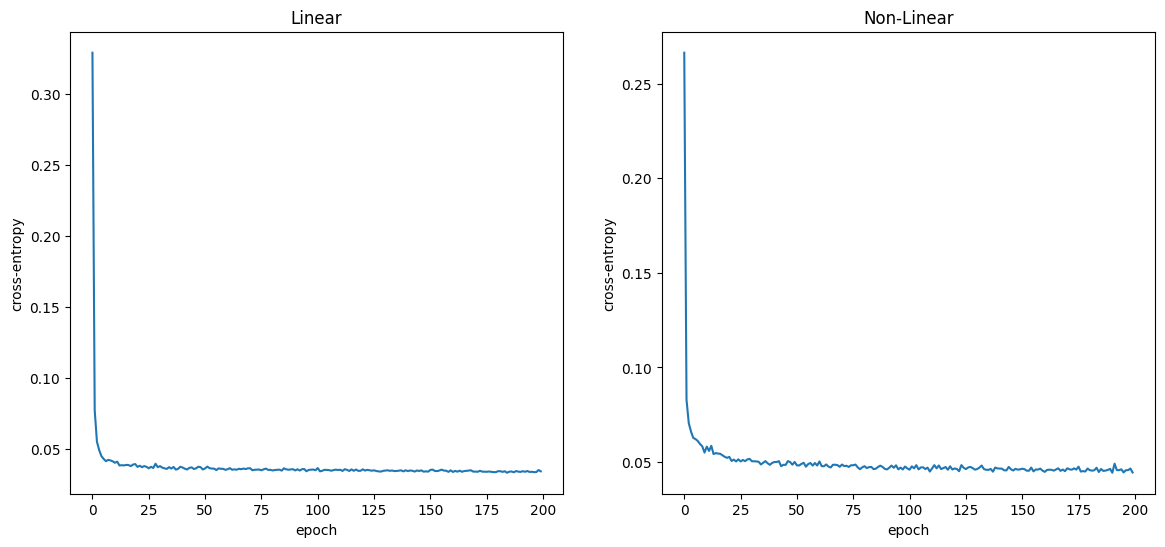

In [ ]:
# Training Performance
plt.figure(figsize=(14, 6))

# Linear
plt.subplot(1, 2, 1)
plt.title('Linear')
plt.plot(history1_linear.history['loss'])
plt.ylabel('cross-entropy')
plt.xlabel('epoch')


# Non-Linear
plt.subplot(1, 2, 2)
plt.title('Non-Linear')
plt.plot(history2_nonlinear.history['loss'])
plt.ylabel('cross-entropy')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Compute cross-entropy loss for the training set
train_loss_nn1_linear = neural_network_linear.evaluate(training_set_x, training_set_y1, verbose=1)
train_loss_nn2_nonlinear = neural_network_nonlinear.evaluate(training_set_x, training_set_y2, verbose=1)

# Compute cross-entropy loss for the test set
test_loss_nn1_linear = neural_network_linear.evaluate(test_set_x, test_set_y1, verbose=1)
test_loss_nn2_nonlinear = neural_network_nonlinear.evaluate(test_set_x, test_set_y2, verbose=1)

predicted_nn_y1 = neural_network_linear.predict(test_set_x)
predicted_nn_y2 = neural_network_nonlinear.predict(test_set_x)

print(f"Training Loss for neural network 1 linear: {train_loss_nn1_linear:.3f}")
print(f"Test Loss for neural network 1 linear: {test_loss_nn1_linear:.3f}")

print(f"Training Loss for neural network 2 non linear: {train_loss_nn2_nonlinear:.3f}")
print(f"Test Loss for neural network 2 non linear: {test_loss_nn2_nonlinear:.3f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0357
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0414
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0348
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0439
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Loss for neural network 1 linear: 0.035
Test Loss for neural network 1 linear: 0.036
Training Loss for neural network 2 non linear: 0.042
Test Loss for neural network 2 non linear: 0.042


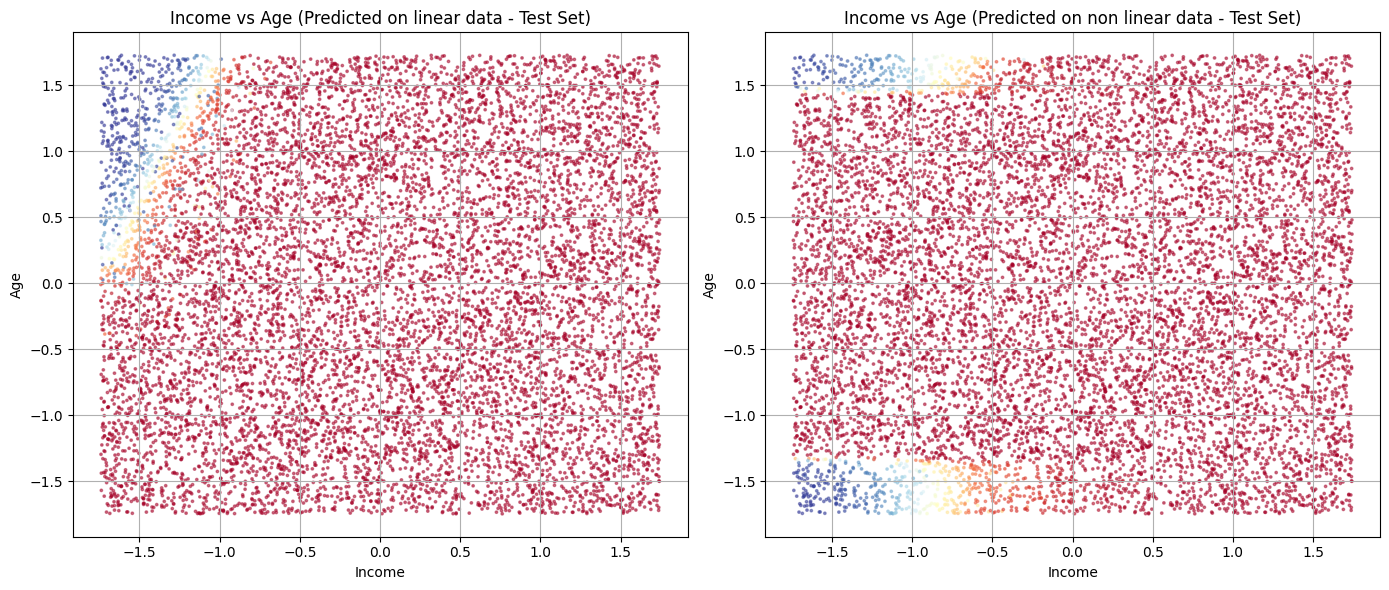

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot for predicted_y1
plt.subplot(1, 2, 1)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_nn_y1, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

# Scatter plot for predicted_y2( really bad!)
plt.subplot(1, 2, 2)
plt.scatter(test_set_x[:, 1], test_set_x[:, 0], c=predicted_nn_y2, cmap=plt.cm.RdYlBu, alpha=0.5, s=3)
plt.title('Income vs Age (Predicted on non linear data - Test Set)')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()

Tuner

In [ ]:
import tensorflow as tf
import keras_tuner as kt

# Customize loss function
def binary_cost_sensitive_loss(y_true, y_pred):
    # Avoid log(0) by clipping predicted probabilities
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)

    # For true positives (y==1): weight the negative log likelihood by 100.
    loss_pos = -100.0 * y_true * tf.math.log(y_pred)

    # For negatives (y==0): use the negative log likelihood; then subtract the profit (1)
    loss_neg = -(1.0 - y_true) * (tf.math.log(1.0 - y_pred) + 1.0)

    # Sum the losses and take the average over the batch.
    loss = loss_pos + loss_neg
    return tf.reduce_mean(loss)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(3,)))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)): #number of layers
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), #number of neurons
                         min_value=16,
                         max_value=128,
                         step=16),
            activation=None #activation function set to none to perform batch normalization
        ))
        model.add(keras.layers.BatchNormalization()) # batch normalization after each Dense layer
        model.add(keras.layers.LeakyReLU(alpha=0.2))   # leaky relu activation function
    model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

    hp_learning_rate = hp.Choice('learning_rate',
                                 values=[1e-2, 1e-3, 1e-4]
                                 )
    optimizers_dict = {
        "Adam":    keras.optimizers.Adam(learning_rate=hp_learning_rate),
        "SGD":     keras.optimizers.SGD(learning_rate=hp_learning_rate)
        }

    hp_optimizers = hp.Choice(
        'optimizer',
        values=["Adam", "SGD", "Adagrad"]
        )

    model.compile(
        loss=binary_cost_sensitive_loss,
        optimizer=optimizers_dict[hp_optimizers],
        metrics=['recall'])

    return model

def tuner_build_model(training_set_x, training_set_y, path, name, e, random_seed):
  tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        seed=random_seed,
        directory=path,
        project_name=name
      )
  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
  tuner.search(training_set_x, training_set_y, epochs=e, validation_split=0.2, callbacks=[stop_early])

  return tuner

# Get the optimal hyperparameters
#tuner_linear = tuner_build_model(training_set_x, training_set_y1, 'tuner', 'tuner_y1', e=epochs)
tuner_nonlinear = tuner_build_model(training_set_x, training_set_y2, 'tuner', 'tuner_y', e=epochs, random_seed)

Trial 10 Complete [00h 01m 06s]
val_loss: -0.42196449637413025

Best val_loss So Far: -0.5199266076087952
Total elapsed time: 00h 30m 54s


In [ ]:

## STILL TO CHECK!
from sklearn.model_selection import KFold
import tensorflow as tf
import keras_tuner as kt
import numpy as np

def tuner_build_model_cv(training_set_x, training_set_y, path, name, e, random_seed, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_seed)
    all_val_losses = []

    # Save the best tuner from all folds
    best_tuner = None
    best_loss = float('inf')

    fold = 1
    for train_index, val_index in kfold.split(training_set_x):
        print(f"\n--- Fold {fold} ---")

        x_train, x_val = training_set_x[train_index], training_set_x[val_index]
        y_train, y_val = training_set_y[train_index], training_set_y[val_index]

        tuner = kt.RandomSearch(
            build_model,
            objective='val_loss',
            max_trials=10,
            executions_per_trial=1,
            seed=42,
            directory=path,
            project_name=f"{name}_fold{fold}"
        )

        stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
        tuner.search(x_train, y_train, epochs=e, validation_data=(x_val, y_val), callbacks=[stop_early])

        best_hp = tuner.get_best_hyperparameters(1)[0]
        best_model = tuner.hypermodel.build(best_hp)
        best_model.fit(x_train, y_train, epochs=e, validation_data=(x_val, y_val), callbacks=[stop_early], verbose=0)

        val_loss = best_model.evaluate(x_val, y_val, verbose=0)[0]
        all_val_losses.append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            best_tuner = tuner

        fold += 1

    print(f"\nAverage validation loss over {n_splits} folds: {np.mean(all_val_losses)}")
    return best_tuner

tuner_nonlinear = tuner_build_model(training_set_x, training_set_y2, 'tuner', 'tuner_y', e=epochs, random_seed
                                    )

In [ ]:
best_NN_nonlinear = tuner_nonlinear.hypermodel.build(tuner_nonlinear.get_best_hyperparameters(num_trials = 1)[0])
#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_nonlinear = best_NN_nonlinear.fit(x=training_set_x, y=training_set_y2, batch_size=batch_size, epochs=300, validation_split=0.2)#, callbacks=[stop_early])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4520 - recall: 0.9820 - val_loss: -0.3204 - val_recall: 0.9939
Epoch 2/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: -0.1196 - recall: 0.9904 - val_loss: 0.2735 - val_recall: 0.9818
Epoch 3/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -0.1854 - recall: 0.9878 - val_loss: 0.3004 - val_recall: 0.9939
Epoch 4/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -0.1932 - recall: 0.9917 - val_loss: -0.3671 - val_recall: 0.9879
Epoch 5/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: -0.2798 - recall: 0.9908 - val_loss: -0.3376 - val_recall: 0.9939
Epoch 6/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: -0.3306 - recall: 0.9928 - val_loss: -0.4596 - val_recall: 0.9879
Epoch 7/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: -0.3376 - recall: 0.9936 - val_loss: -0.4929 - val_recall: 0.9939
Epoch 8/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -0.2455 - recall: 0.9812 - val_loss: -0.2825 - val_re

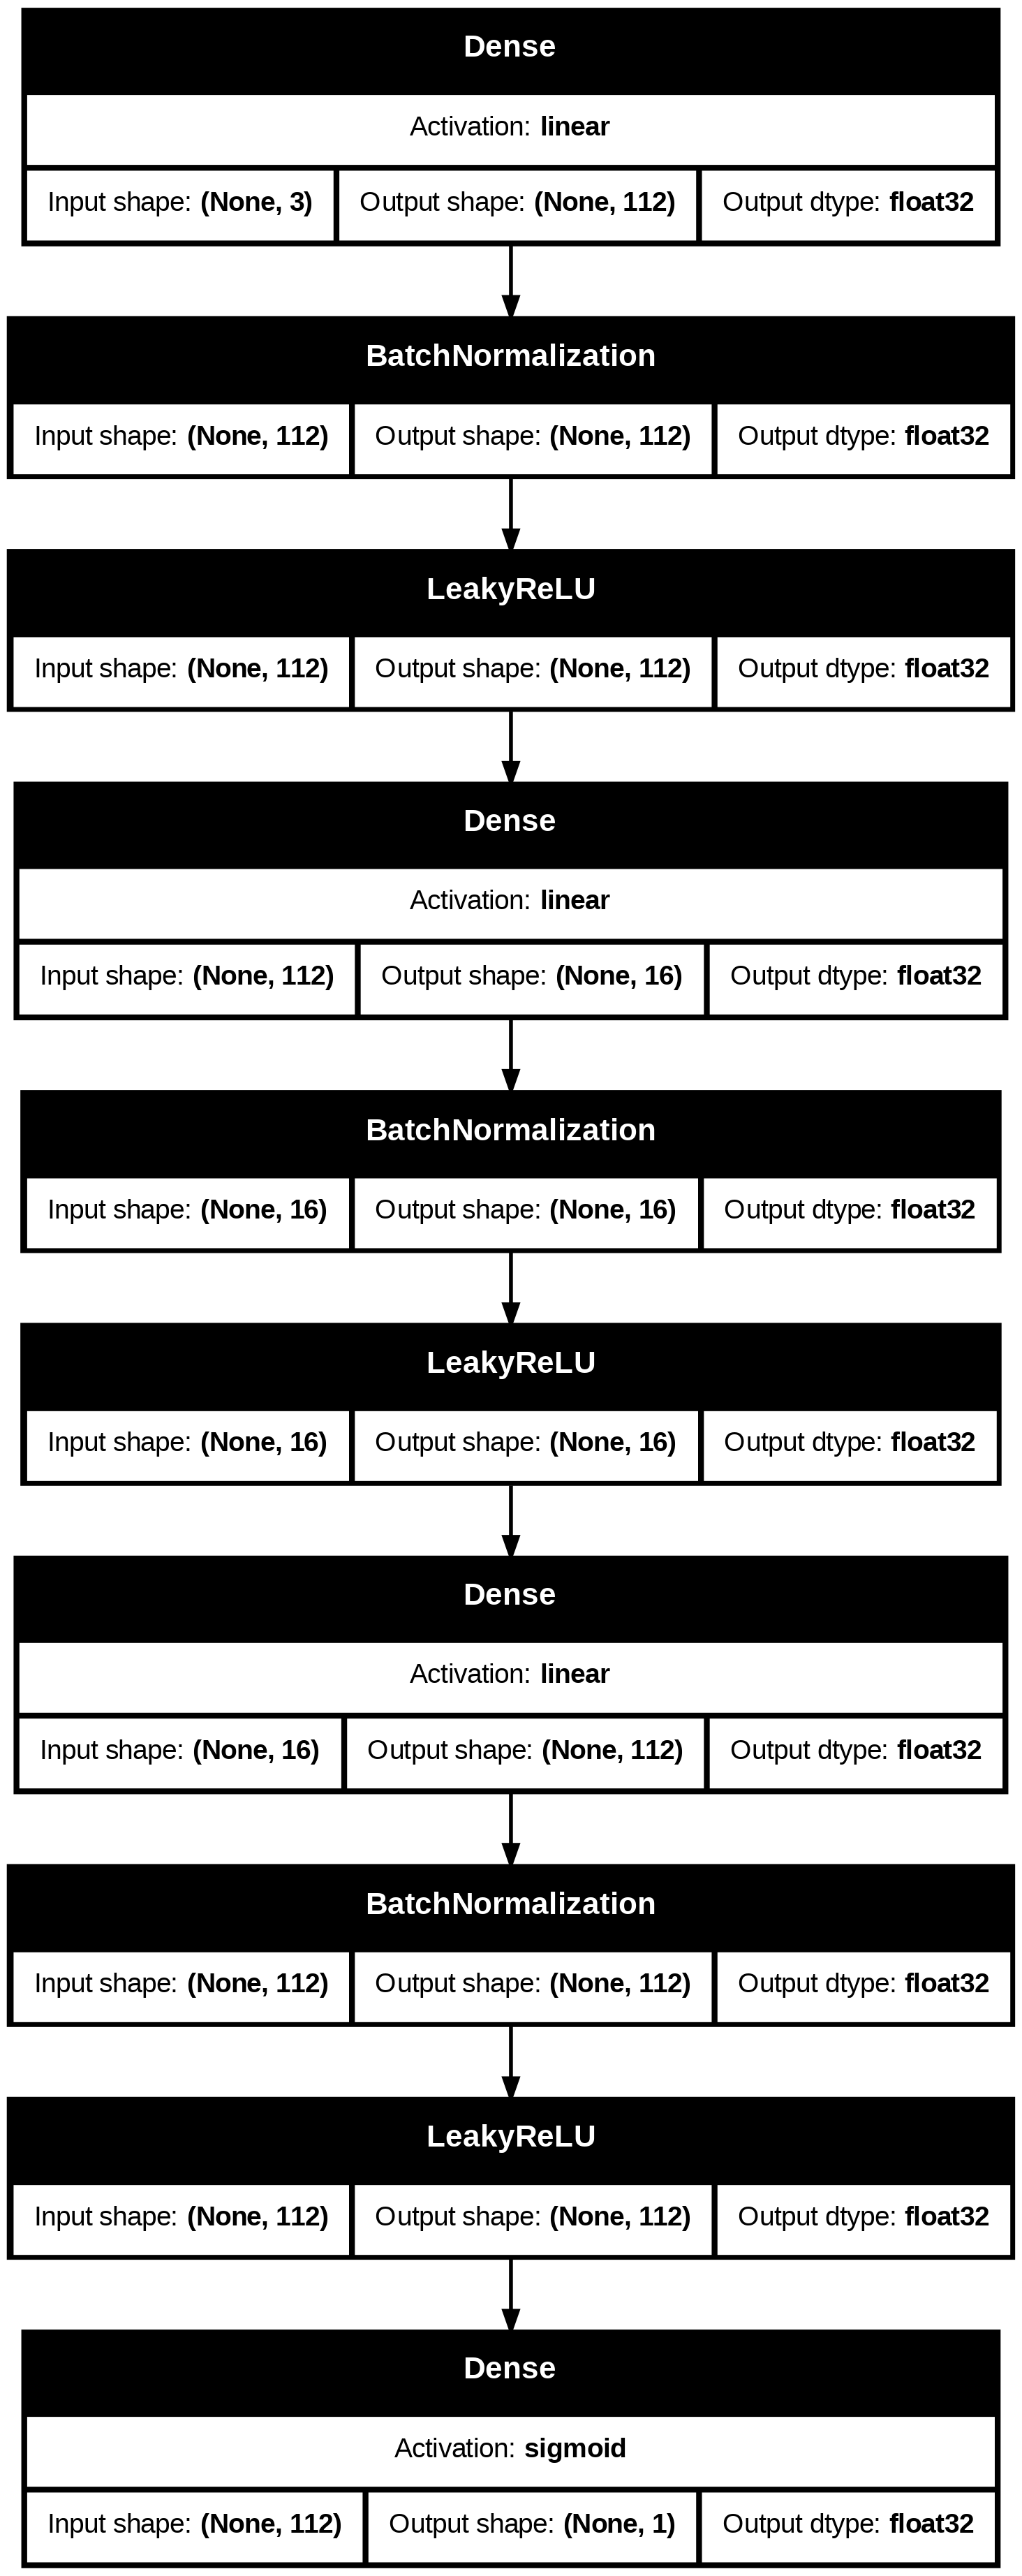

In [ ]:
from tensorflow.keras.utils import plot_model

# Generate both a plot and a text description
plot_model(best_NN_nonlinear, show_shapes=True,
          show_dtype=True, expand_nested=True,
          show_layer_activations=True)

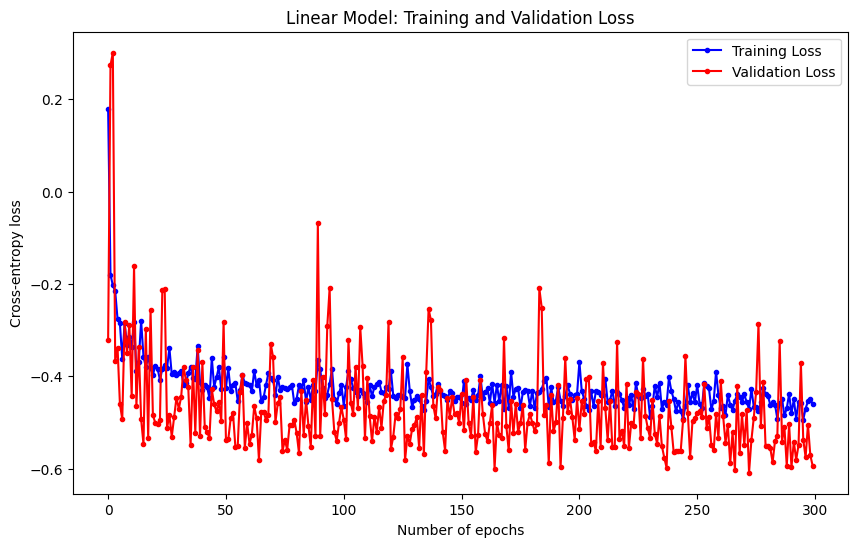

In [ ]:
# Plot cross-entropy for linear data
plt.figure(figsize=(10, 6))
plt.title('Linear Model: Training and Validation Loss')
plt.plot(history_nonlinear.history['loss'], 'b.-', label='Training Loss')
plt.plot(history_nonlinear.history['val_loss'], 'r.-', label='Validation Loss')
plt.ylabel('Cross-entropy loss')
plt.xlabel('Number of epochs')
plt.legend()

# Get current model losses
plt.show()

In [ ]:
# Compute cross-entropy loss for the test set
test_loss_nn2 = best_NN_nonlinear.evaluate(test_set_x, test_set_y2, verbose=1)

print(f"Test Loss for neural network non linear: {test_loss_nn2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -0.4537 - recall: 0.9841
Test Loss for neural network non linear: [-0.5566713213920593, 0.9913232326507568]


### 3c) ROC curves and AUC scores

In [ ]:
# Get predictions for all models
# Linear data models
logistic_linear_test_pred = logistic_regression_linear.predict_proba(test_set_x)[:, 1]
neural_linear_test_pred = neural_network_linear.predict(test_set_x)

# Non-linear data models
logistic_nonlinear_test_pred = logistic_regression_nonlinear.predict_proba(test_set_x)[:, 1]
neural_nonlinear_test_pred = best_NN_nonlinear.predict(test_set_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Compute ROC curves and AUC scores
# Linear data comparison
fpr_logistic_linear, tpr_logistic_linear, _ = roc_curve(test_set_y1, logistic_linear_test_pred)
auc_logistic_linear = roc_auc_score(test_set_y1, logistic_linear_test_pred)

fpr_neural_linear, tpr_neural_linear, _ = roc_curve(test_set_y1, neural_linear_test_pred)
auc_neural_linear = roc_auc_score(test_set_y1, neural_linear_test_pred)

# Non-linear data comparison
fpr_logistic_nonlinear, tpr_logistic_nonlinear, _ = roc_curve(test_set_y2, logistic_nonlinear_test_pred)
auc_logistic_nonlinear = roc_auc_score(test_set_y2, logistic_nonlinear_test_pred)

fpr_neural_nonlinear, tpr_neural_nonlinear, _ = roc_curve(test_set_y2, neural_nonlinear_test_pred)
auc_neural_nonlinear = roc_auc_score(test_set_y2, neural_nonlinear_test_pred)

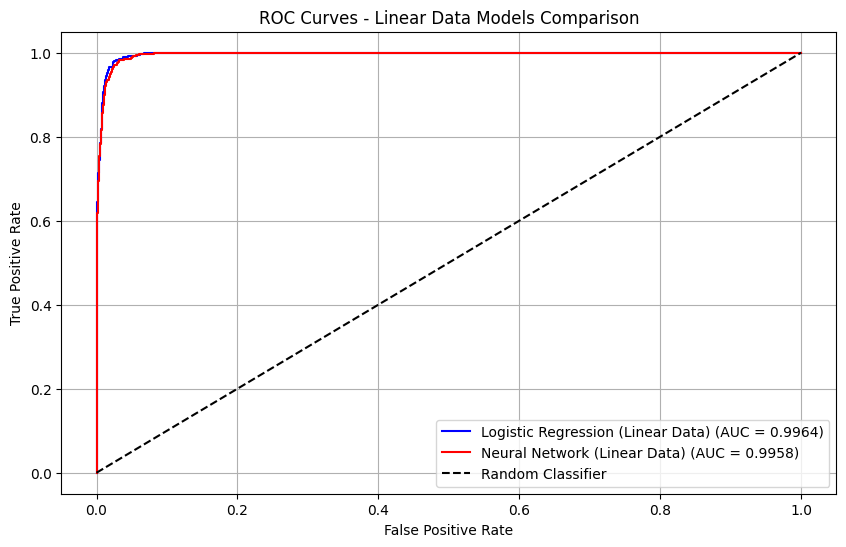

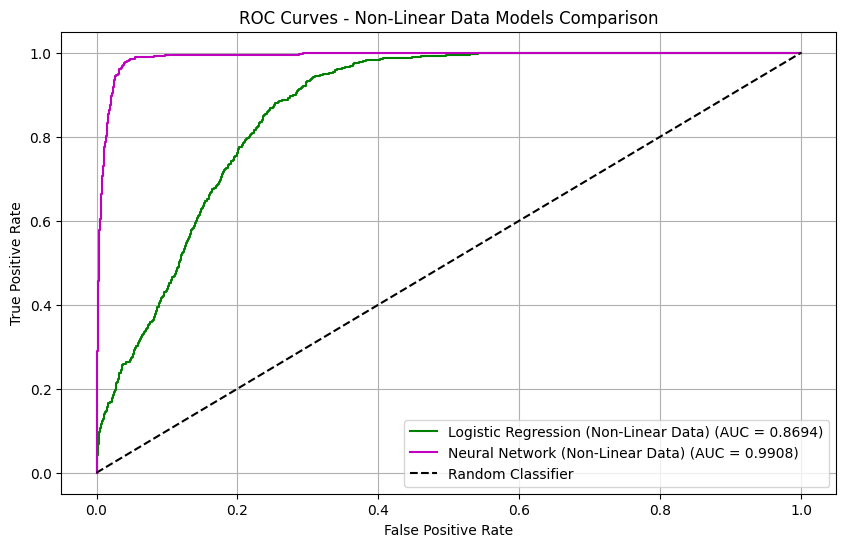

Linear Data Comparison:
Logistic Regression AUC: 0.9964
Neural Network AUC: 0.9958

Non-Linear Data Comparison:
Logistic Regression AUC: 0.8694
Neural Network AUC: 0.9908


In [ ]:
# Plot ROC curves for linear data comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic_linear, tpr_logistic_linear, 'b-', label=f'Logistic Regression (Linear Data) (AUC = {auc_logistic_linear:.4f})')
plt.plot(fpr_neural_linear, tpr_neural_linear, 'r-', label=f'Neural Network (Linear Data) (AUC = {auc_neural_linear:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Linear Data Models Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for non-linear data comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic_nonlinear, tpr_logistic_nonlinear, 'g-', label=f'Logistic Regression (Non-Linear Data) (AUC = {auc_logistic_nonlinear:.4f})')
plt.plot(fpr_neural_nonlinear, tpr_neural_nonlinear, 'm-', label=f'Neural Network (Non-Linear Data) (AUC = {auc_neural_nonlinear:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Non-Linear Data Models Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC scores
print("Linear Data Comparison:")
print(f"Logistic Regression AUC: {auc_logistic_linear:.4f}")
print(f"Neural Network AUC: {auc_neural_linear:.4f}")
print("\nNon-Linear Data Comparison:")
print(f"Logistic Regression AUC: {auc_logistic_nonlinear:.4f}")
print(f"Neural Network AUC: {auc_neural_nonlinear:.4f}")

# Exercise 4. Comparison of lending strategies

In [ ]:
lr2_pred_test = logistic_regression_nonlinear.predict_proba(test_set_x)[:,1]
nn2_pred_test = best_NN_nonlinear.predict(test_set_x).flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# 4. Lending Strategy Simulation
interest_all = 0.055
interest_sel = 0.010

# Simulate 1000 market scenarios
D = np.random.binomial(1,p2[m:, np.newaxis], size=(n, 1000))

# Strategies (per borrower)
def strategy_per_borrower(d_matrix, selected_indices, interest):
    loan_amount = 100
    repayments = loan_amount * (1 + interest)
    profit_matrix = np.where(d_matrix == 0, repayments, 0) - loan_amount
    return profit_matrix[selected_indices].mean(axis=0)

# Strategy (i): All borrowers
profit_i = strategy_per_borrower(D, np.arange(n), interest_all)
profit_i_mean = profit_i.mean(axis=0)

# Strategy (ii): Logistic Regression (threshold=0.05)
selected_lr = np.where(lr2_pred_test <= 0.05)[0]
profit_lr = strategy_per_borrower(D, selected_lr, interest_sel)
profit_lr_mean = profit_lr.mean(axis=0)

# Strategy (iii): Neural Network (threshold=0.05)
selected_nn = np.where(nn2_pred_test <= 0.05)[0]
profit_nn = strategy_per_borrower(D, selected_nn, interest_sel)
profit_nn_mean = profit_nn.mean(axis=0)

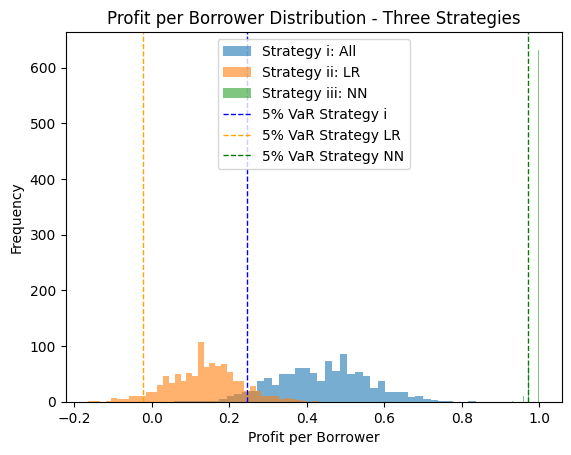

Mean Profit Strategy i: 0.4397558
Mean Profit Strategy LR: 0.1374242125984252
Mean Profit Strategy NN: 0.9936245847176078
5% VaR Strategy i: 0.2461
5% VaR Strategy LR: -0.02249718785151856
5% VaR Strategy NN: 0.9720376522702104


In [ ]:
# 5. Results and Visualization
# Plot histograms of the three strategies
plt.hist(profit_i, bins=40, alpha=0.6, label='Strategy i: All')
plt.hist(profit_lr, bins=40, alpha=0.6, label='Strategy ii: LR')
plt.hist(profit_nn, bins=40, alpha=0.6, label='Strategy iii: NN')

plt.xlabel('Profit per Borrower')
plt.axvline(np.percentile(profit_i, 5), color='blue', linestyle='dashed', linewidth=1, label='5% VaR Strategy i')
plt.axvline(np.percentile(profit_lr, 5), color='orange', linestyle='dashed', linewidth=1, label='5% VaR Strategy LR')
plt.axvline(np.percentile(profit_nn, 5), color='green', linestyle='dashed', linewidth=1, label='5% VaR Strategy NN')
plt.ylabel('Frequency')
plt.legend()
plt.title('Profit per Borrower Distribution - Three Strategies')
plt.show()
#print the mean profit for each strategy
print('Mean Profit Strategy i:', profit_i_mean)
print('Mean Profit Strategy LR:', profit_lr_mean)
print('Mean Profit Strategy NN:', profit_nn_mean)
# Calculate VaR per borrower for the three strategies
print('5% VaR Strategy i:', np.percentile(profit_i, 5))
print('5% VaR Strategy LR:', np.percentile(profit_lr, 5))
print('5% VaR Strategy NN:', np.percentile(profit_nn, 5))

In [ ]:
def strategy_total_profit(default_matrix, selected_indices, interest):
    """
    Calculate total profit for a given strategy.
    Parameters:
    default_matrix (np.ndarray): Matrix of defaults for each borrower.
    selected_indices (list): Indices of selected borrowers.
    interest (float): Interest rate for the selected borrowers.

    Returns:
    np.ndarray: Total profit for the selected borrowers.
    """

    loan_amount = 100
    # Calculate repayments and profit matrix
    repayments = loan_amount * (1 + interest)
    profit_matrix = np.where(default_matrix == 0, repayments, 0) - loan_amount
    return profit_matrix[selected_indices].sum(axis=0)

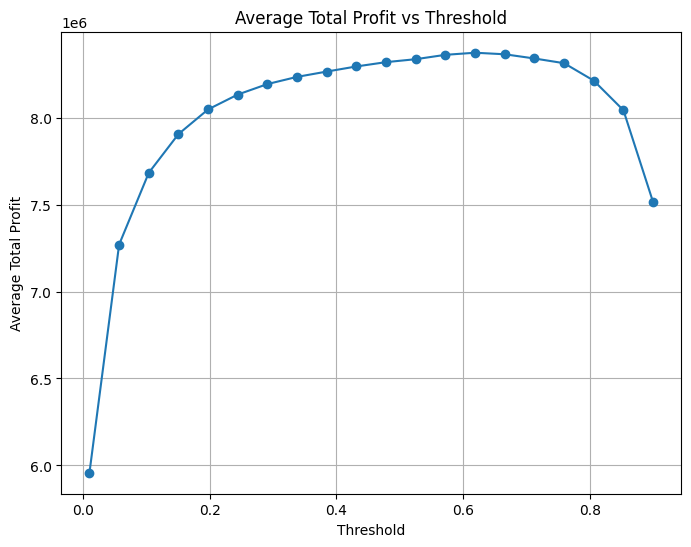

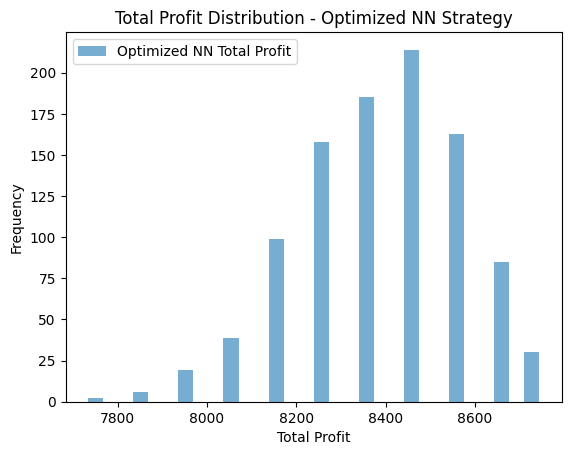

5% VaR Optimized NN Total Strategy: 8037.0
Optimal NN Average Profit: 8372.724
Optimal NN Threshold (Total PnL): 0.6189473684210526


In [ ]:
# Optimal threshold selection maximizing total PnL
thresholds = np.linspace(0.01, 0.90, 20)
best_threshold, best_total_profit = 0, 0
total_profits_vs_threshold = []

for thresh in thresholds:
    selected_nn_thresh = np.where(nn2_pred_test <= thresh)[0]
    total_profit = strategy_total_profit(D, selected_nn_thresh, interest_sel).sum()
    total_profits_vs_threshold.append(total_profit)
    if total_profit > best_total_profit:
        best_total_profit = total_profit
        best_threshold = thresh

# Plot Total Profit vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, total_profits_vs_threshold, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Average Total Profit')
plt.title('Average Total Profit vs Threshold')
plt.grid(True)
plt.show()

# Final optimal NN strategy based on total PnL
selected_nn_opt_total = np.where(nn2_pred_test <= best_threshold)[0]
total_profit_nn_opt = strategy_total_profit(D, selected_nn_opt_total, interest_sel)

# Plot histogram for optimized strategy (total profit)
plt.hist(total_profit_nn_opt, bins=30, alpha=0.6, label='Optimized NN Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.legend()
plt.title('Total Profit Distribution - Optimized NN Strategy')
plt.show()

# Calculate VaR for optimized total profit strategy
print('5% VaR Optimized NN Total Strategy:', np.percentile(total_profit_nn_opt, 5))
print('Optimal NN Average Profit:', total_profit_nn_opt.mean())
print('Optimal NN Threshold (Total PnL):', best_threshold)

Best Interest Rate: 0.1
Best Threshold: 0.01
Best PnL/Capital Ratio: 613.8136569313169


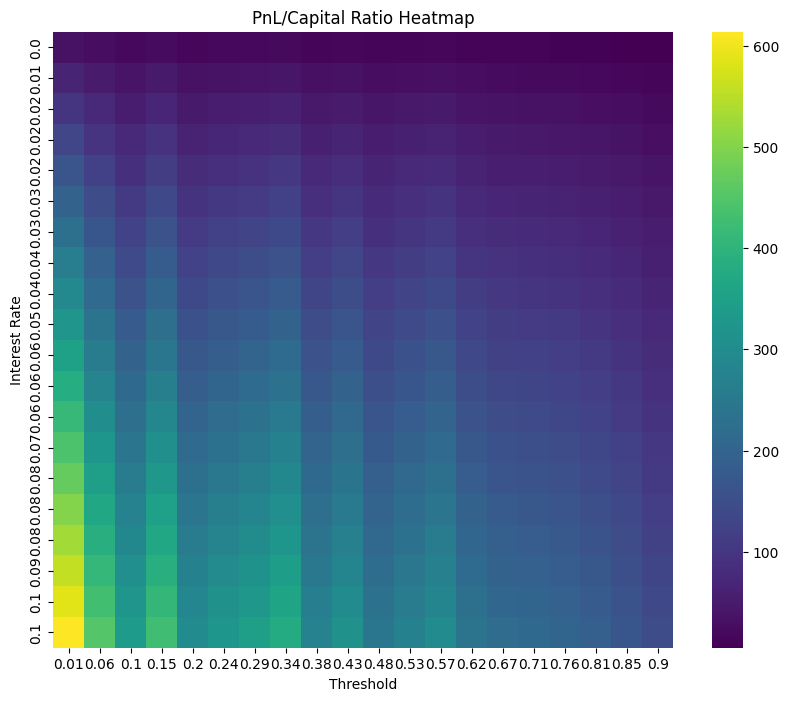

In [ ]:
# Define ranges for interest rates and thresholds
interest_rates = np.linspace(0.005, 0.1, 20)  # Interest rates from 1% to 10%
thresholds = np.linspace(0.01, 0.9, 20)      # Thresholds from 0.01 to 0.2

best_interest, best_threshold = 0, 0
best_ratio = -np.inf

# Store results for visualization
results = []

for interest in interest_rates:
    for thresh in thresholds:
        # Select borrowers based on the threshold
        selected_nn_thresh = np.where(nn2_pred_test <= thresh)[0]

        # Calculate PnL and VaR
        total_profit = strategy_total_profit(D, selected_nn_thresh, interest).mean()
        VaR = np.percentile(strategy_total_profit(D, selected_nn_thresh, interest), 5)

        # Calculate capital and ratio
        capital = total_profit - VaR
        if capital > 0:  # Avoid division by zero or negative capital
            ratio = total_profit / capital
            results.append((interest, thresh, ratio))

            # Update the best parameters
            if ratio > best_ratio:
                best_ratio = ratio
                best_interest = interest
                best_threshold = thresh

# Print the best parameters and corresponding ratio
print('Best Interest Rate:', best_interest)
print('Best Threshold:', best_threshold)
print('Best PnL/Capital Ratio:', best_ratio)

# Visualize the results
ratios = np.array([r[2] for r in results]).reshape(len(interest_rates), len(thresholds))
plt.figure(figsize=(10, 8))
sns.heatmap(ratios, xticklabels=np.round(thresholds, 2), yticklabels=np.round(interest_rates, 2), annot=False, cmap='viridis')
plt.xlabel('Threshold')
plt.ylabel('Interest Rate')
plt.title('PnL/Capital Ratio Heatmap')
plt.show()